#Q1 
Projection in PCA (Principal Component Analysis):

In PCA, a projection refers to the transformation of data from its original high-dimensional space into a lower-dimensional space, typically using a set of orthogonal axes called principal components. The primary goal of PCA is to capture the maximum variance in the data with a reduced number of dimensions. These principal components are linear combinations of the original features.

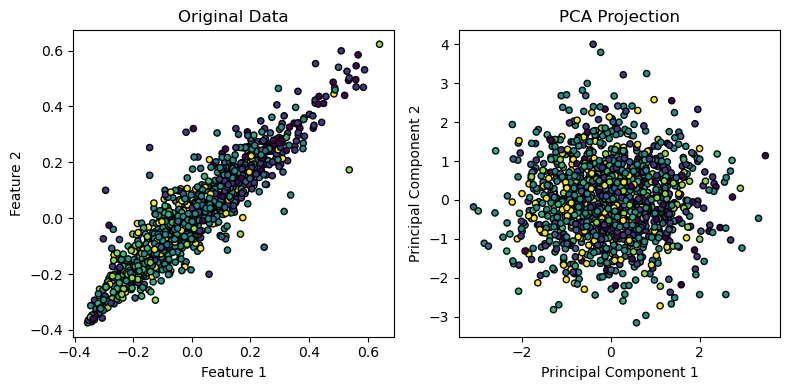

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

# Load the Labeled Faces in the Wild (LFW) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Standardize the data
X = lfw_people.data
X_mean = np.mean(X, axis=0)
X -= X_mean

# Apply PCA
n_components = 150
pca = PCA(n_components=n_components, whiten=True).fit(X)

# Project the data onto the first two principal components
X_pca = pca.transform(X)

# Plot the original and projected data
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=lfw_people.target, cmap='viridis', edgecolor='k', s=20)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=lfw_people.target, cmap='viridis', edgecolor='k', s=20)
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

#Q2 Optimization Problem in PCA:

The optimization problem in PCA involves finding a set of orthogonal axes (principal components) that maximize the variance of the data when projected onto these axes. Mathematically, PCA aims to solve the following optimization problem:

Given a data matrix X of size × m×n, where m is the number of samples and n is the number of features, the goal is to find the matrix W of size × n×k, where k is the desired dimensionality (number of principal components), such that the variance of the projected data Xproj is maximized:


The solution to this problem is obtained by finding the eigenvectors and eigenvalues of the covariance matrix of X, and the eigenvectors corresponding to the top k eigenvalues form the matrix W.

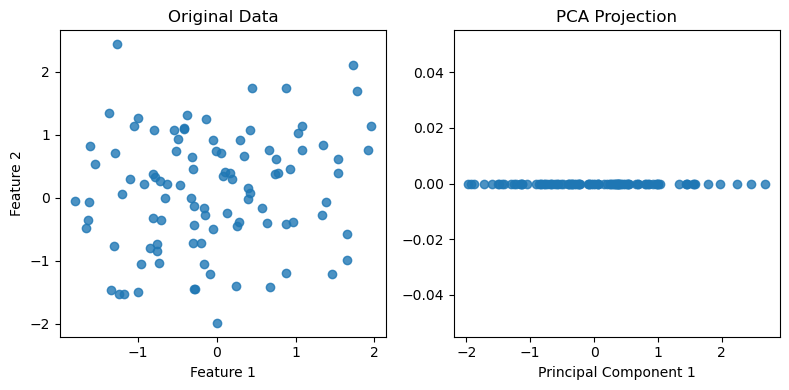

In [2]:
#2
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with two features
np.random.seed(42)
X = np.random.randn(100, 2)

# Create a transformation matrix
rotation_matrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                            [np.sin(np.pi/4), np.cos(np.pi/4)]])
X_rotated = X.dot(rotation_matrix)

# Apply PCA
covariance_matrix = np.cov(X_rotated, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Select the top principal component
W = eigenvectors_sorted[:, 0]

# Project the data onto the principal component
X_proj = X_rotated.dot(W)

# Plot the original and projected data
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.8)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_proj, np.zeros_like(X_proj), alpha=0.8)
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')

plt.tight_layout()
plt.show()

#Q3 Relationship Between Covariance Matrices and PCA:

The relationship between covariance matrices and PCA lies in the fact that PCA identifies the principal components by analyzing the covariance matrix of the input data. The covariance matrix captures the relationships between different features and helps PCA determine the directions (eigenvectors) along which the data varies the most. The eigenvectors of the covariance matrix represent the principal components, and the corresponding eigenvalues indicate the variance along those components.

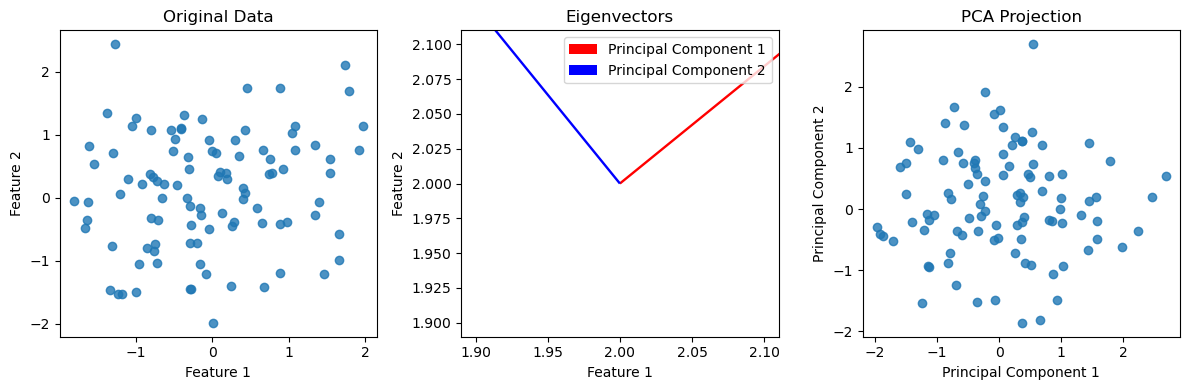

In [10]:
#3
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with two features
np.random.seed(42)
X = np.random.randn(100, 2)

# Create a transformation matrix
rotation_matrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                            [np.sin(np.pi/4), np.cos(np.pi/4)]])
X_rotated = X.dot(rotation_matrix)

# Calculate the covariance matrix
covariance_matrix = np.cov(X_rotated, rowvar=False)

# Apply PCA
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Project the data onto the principal components
X_proj = X_rotated.dot(eigenvectors_sorted)

# Plot the original data, eigenvectors, and PCA projection
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.8)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 3, 2)
plt.quiver(2, 2, eigenvectors_sorted[0, 0], eigenvectors_sorted[1, 0], scale=3, scale_units='xy', color='r', label='Principal Component 1')
plt.quiver(2, 2, eigenvectors_sorted[0, 1], eigenvectors_sorted[1, 1], scale=3, scale_units='xy', color='b', label='Principal Component 2')
plt.title('Eigenvectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_proj[:, 0], X_proj[:, 1], alpha=0.8)
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

#Q4 Impact of the Choice of Number of Principal Components on PCA:

The choice of the number of principal components in PCA has a significant impact on the balance between dimensionality reduction and information preservation. Choosing too few components may result in loss of important information, while choosing too many may lead to overfitting and increased computational complexity. A common practice is to choose the number of components that retains a certain percentage of the total variance in the data.

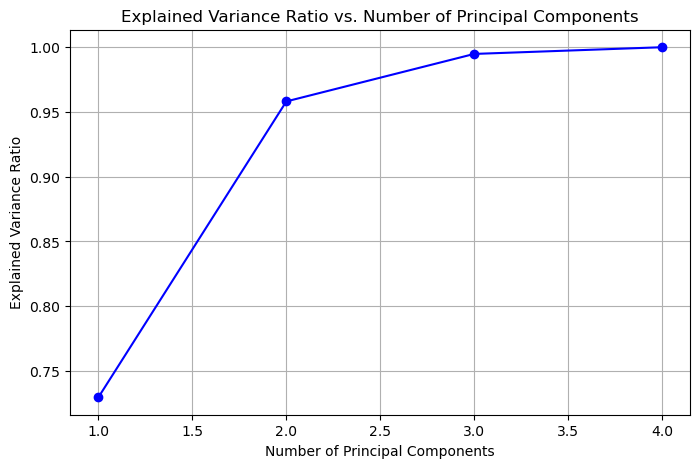

In [11]:
#4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA for various numbers of components
num_components = X.shape[1]
explained_variance_ratio = np.zeros(num_components)

for i in range(1, num_components + 1):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_standardized)
    explained_variance_ratio[i - 1] = np.sum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_components + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

#Q5 Using PCA for Feature Selection:

PCA can be used for feature selection by considering the importance of each feature in capturing the variance of the data. Features with low variance contribute less to the overall information content of the data and may be removed without significant loss. This is achieved by selecting a subset of the principal components corresponding to the most significant features.

Benefits:

Dimensionality Reduction: PCA reduces the number of features while retaining the most critical information, helping to mitigate the curse of dimensionality.

Collinearity Handling: PCA can handle collinearity among features, as it identifies uncorrelated principal components.

Noise Reduction: Features with low variance are often noise or redundant information. Removing them can enhance model generalization.

In [12]:
#5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the data
X_standardized = StandardScaler().fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Apply PCA for feature selection
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier (Random Forest) on the reduced feature set
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with PCA: {accuracy:.2f}")

Accuracy with PCA: 0.96


#Q6 Common Applications of PCA:

Dimensionality Reduction: Reducing the number of features while retaining the most critical information.

Noise Reduction: Removing features with low variance that may represent noise or irrelevant information.

Collinearity Handling: Identifying uncorrelated principal components to address multicollinearity in regression.

Image Compression: Reducing the dimensionality of image data while preserving essential features.

Anomaly Detection: Identifying outliers by comparing reconstruction errors in the reduced feature space.

Face Recognition: Extracting essential features for facial recognition tasks.

Recommendation Systems: Reducing the dimensionality of user-item interaction matrices in collaborative filtering.

Eigenfaces: Representing faces as linear combinations of eigenfaces for facial recognition.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/jovyan/scikit_learn_data


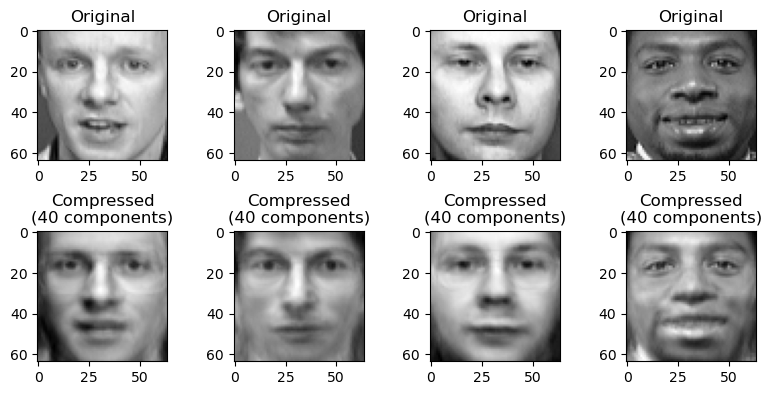

In [14]:
#6
#demonstrating PCA for image compression using the Olivetti Faces dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

# Load the Olivetti Faces dataset
faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_images = faces_data.images.reshape((len(faces_data.images), -1))

# Apply PCA for image compression
n_components = 40
pca = PCA(n_components=n_components, whiten=True)
faces_images_pca = pca.fit_transform(faces_images)
faces_images_compressed = pca.inverse_transform(faces_images_pca)

# Visualize original and compressed images
plt.figure(figsize=(8, 4))
for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.imshow(faces_images[i].reshape(64, 64), cmap='gray')
    plt.title('Original')

    plt.subplot(2, 4, i + 5)
    plt.imshow(faces_images_compressed[i].reshape(64, 64), cmap='gray')
    plt.title(f'Compressed\n({n_components} components)')

plt.tight_layout()
plt.show()

#Q7 Relationship Between Spread and Variance in PCA:

In PCA, spread and variance are related concepts. The spread of data along a principal component is proportional to the variance along that component. Principal components are chosen to maximize the variance, indicating that they capture the directions in which the data is most spread out.

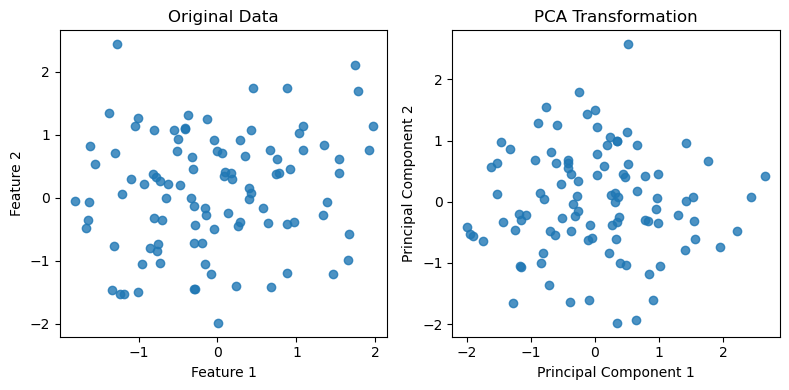

In [15]:
#7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic data with two features
np.random.seed(42)
X = np.random.randn(100, 2)

# Create a transformation matrix
rotation_matrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                            [np.sin(np.pi/4), np.cos(np.pi/4)]])
X_rotated = X.dot(rotation_matrix)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_rotated)

# Plot the original and PCA-transformed data
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.8)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.title('PCA Transformation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

#Q8 PCA and Identification of Principal Components:

PCA identifies principal components by finding the directions in the feature space along which the data has the maximum variance (spread). The principal components are the eigenvectors of the covariance matrix, and their corresponding eigenvalues represent the variance of the data along those components. The higher the eigenvalue, the more spread out the data is along the corresponding principal component.

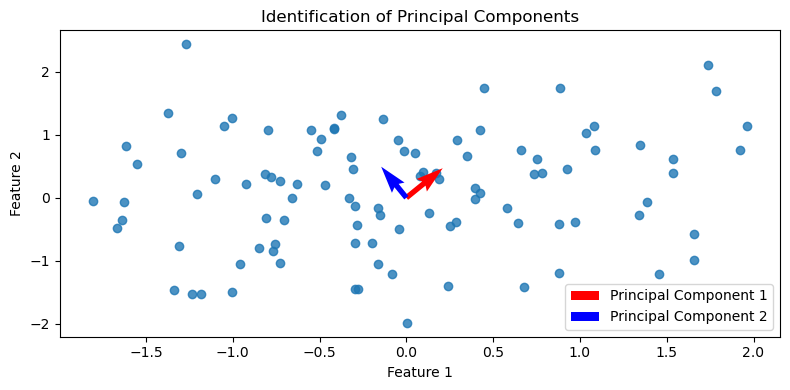

In [19]:
#8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic data with two features
np.random.seed(42)
X = np.random.randn(100, 2)

# Create a transformation matrix
rotation_matrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                            [np.sin(np.pi/4), np.cos(np.pi/4)]])
X_rotated = X.dot(rotation_matrix)

# Calculate the covariance matrix
covariance_matrix = np.cov(X_rotated, rowvar=False)

# Apply PCA
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Plot the original data and eigenvectors
plt.figure(figsize=(8, 4))

plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.8)
plt.quiver(0, 0, eigenvectors_sorted[0, 0], eigenvectors_sorted[1, 0], scale=3, scale_units='xy', color='r', label='Principal Component 1')
plt.quiver(0, 0, eigenvectors_sorted[0, 1], eigenvectors_sorted[1, 1], scale=3, scale_units='xy', color='b', label='Principal Component 2')
plt.title('Identification of Principal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

#Q9 Handling Data with Varied Variances in PCA:

PCA handles data with varied variances by identifying the directions (principal components) in which the data has the highest variance. If some dimensions have high variance and others have low variance, PCA will prioritize the dimensions with high variance when identifying the principal components. This ensures that the most significant information is captured, even if it is concentrated in a subset of dimensions.

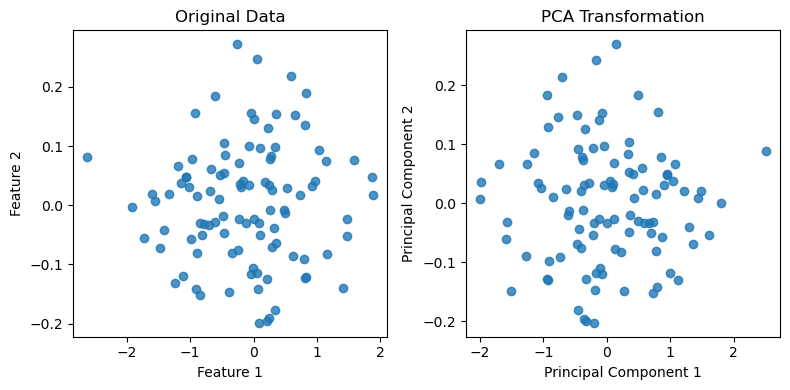

In [21]:
#9
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic data with two features (one with high variance, one with low variance)
np.random.seed(42)
X = np.random.randn(100, 2)
X[:, 1] = 0.1 * X[:, 1]  # Reduce variance in the second dimension

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the original and PCA-transformed data
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.8)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.title('PCA Transformation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()